<a href="https://colab.research.google.com/github/AlchemistDude/Cadenas-de-Markov-y-Aplicaciones-2024-1/blob/main/Tarea3CMbeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes
- Oscar Juian Rogriguez Cardenas
-Tania Julieth Araque Dueñas
-Angela Sofia Rubiano Quintero

#Ejercicio 1

Considere el modelo Ising: en el lattice $k x k$ $(10 \leq k \leq 20)$ \\
$\pi_\beta (\eta) = \frac{1}{Z_\beta } e^{-\beta H(\eta)}$ . Donde $H(\eta) = -\sum_{x\sim y} \eta_x \eta_y $ y $\beta >0$ es el inverso de la temperatura.

#Solución:

-Veremos algunas de las simulaciones para estudiar su comportamiento. \\

A) La primera haciendo uso de el algorimo MCMC Gibbs sampler  en este caso para generar 100 muestras ***aproximadas*** del modelo Ising con inverso de temperatura , en $\beta  = ${$0,0.1,0.2,...,0.9,1$}

B) La segunda haciendo uso de el algoritmo de Propp-Wilson Sandwiching para obtener 100 muestras ***exactas*** del modelo Ising con las mismas temperaturas que en item a) $\beta  = ${$0,0.1,0.2,...,0.9,1$}

C) Estimación y reportes

#a) 100 muestras aproximadas


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, IntSlider, FloatSlider

# Función auxiliar para calcular la probabilidad de actualización
def calcular_probabilidad(beta, delta_energia):
    return 1 / (1 + np.exp(-2 * beta * delta_energia))

# Función para encontrar vecinos del vértice en la cuadrícula
def calcular_vecinos(lattice, i, j):
    vecinos = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    positivos = sum(lattice[(i + dx) % lattice.shape[0], (j + dy) % lattice.shape[1]] == 1
                    for dx, dy in vecinos)
    negativos = 4 - positivos  # 4 vecinos en total, resto son negativos
    return positivos, negativos

# Función para el muestreador de Gibbs
def gibbs_sampler(lattice, beta):
    # Selección de una posición aleatoria
    i, j = random.choices(range(lattice.shape[0]), k=2)  # Selección de una posición aleatoria
    vecinos_positivos, vecinos_negativos = calcular_vecinos(lattice, i, j)
    delta_energia = vecinos_positivos - vecinos_negativos

    # Calcular probabilidad de cambio usando la función auxiliar
    probabilidad_cambio = calcular_probabilidad(beta, delta_energia)
    lattice[i, j] = 1 if random.random() < probabilidad_cambio else -1

    return lattice

# Función interactiva para ejecutar el muestreador de Gibbs
def ejecutar_muestreador(beta, tamaño):
    iteraciones = [10**3, 10**4, 10**5]  # Iteraciones donde se tomaran muestras

    lattice = np.full((tamaño, tamaño), -1)  # Inicializar cuadrilla con -1
    print(f"\nMuestras para beta = {beta}:")

    # Iteración para el muestreo
    for paso in range(1, max(iteraciones) + 1):
        lattice = gibbs_sampler(lattice, beta)

        # Muestreo y visualización en iteraciones especificadas
        if paso in iteraciones:
            print(f"Iteración {paso}:")
            plt.imshow(lattice, cmap='Purples', interpolation='nearest')
            plt.title(f"Beta = {beta}, Iteración = {paso}")
            plt.show()

# Crear sliders interactivos para beta y tamaño
interact(ejecutar_muestreador,
         beta=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Beta'),
         tamaño=IntSlider(min=10, max=20, step=1, value=10, description='k'))

interactive(children=(FloatSlider(value=0.5, description='Beta', max=1.0), IntSlider(value=10, description='k'…

<function __main__.ejecutar_muestreador(beta, tamaño)>

Tomamos por ejemplo en este caso la interacion 10000, por motivos de desarrollo de los siguientes puntos , para los diferentes valores de $\beta$ en el lattice $k$=10 , obteniendo asi muestras que siguen este comportamiento (en el codigo anterior se puede visulizar el dinamismo de las muestras haciendo uso de las barras interactivas)

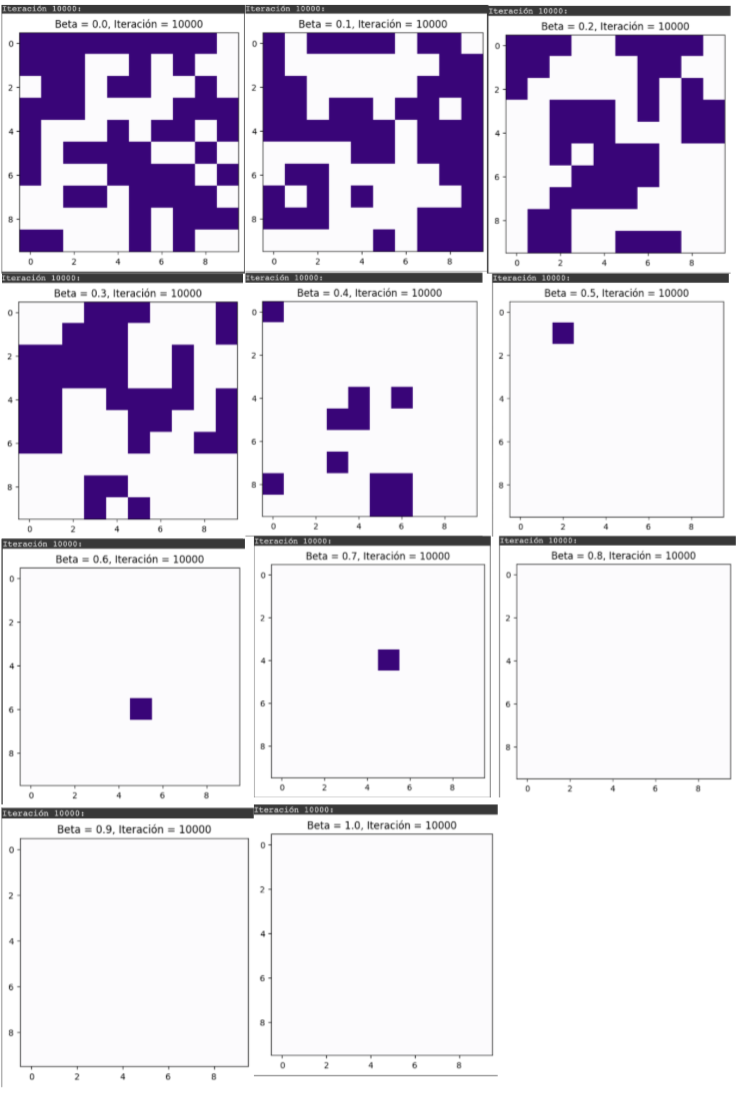

Generemos 100 muestras por ejemplo

100 muestras generadas para diferentes valores de beta.
[array([[-1, -1, -1,  1, -1, -1, -1, -1, -1, -1],
       [-1,  1,  1,  1,  1, -1, -1,  1, -1, -1],
       [-1, -1,  1, -1,  1,  1, -1,  1,  1, -1],
       [-1, -1, -1,  1,  1, -1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1,  1, -1, -1, -1, -1, -1, -1,  1],
       [-1,  1,  1, -1, -1,  1,  1, -1, -1,  1],
       [ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1, -1, -1,  1, -1,  1, -1, -1,  1],
       [ 1, -1, -1, -1, -1, -1,  1, -1, -1, -1]]), array([[-1, -1,  1,  1, -1, -1, -1,  1, -1,  1],
       [ 1, -1,  1,  1,  1, -1,  1,  1, -1, -1],
       [-1,  1,  1, -1,  1,  1,  1, -1,  1, -1],
       [-1,  1,  1,  1,  1, -1, -1, -1,  1,  1],
       [-1, -1,  1, -1, -1, -1, -1, -1, -1,  1],
       [-1,  1,  1, -1, -1, -1,  1,  1, -1, -1],
       [ 1,  1,  1, -1, -1, -1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1, -1, -1, -1,  1, -1],
       [ 1,  1,  1, -1, -1,  1,  1, -1, -1, -1],
       [ 1

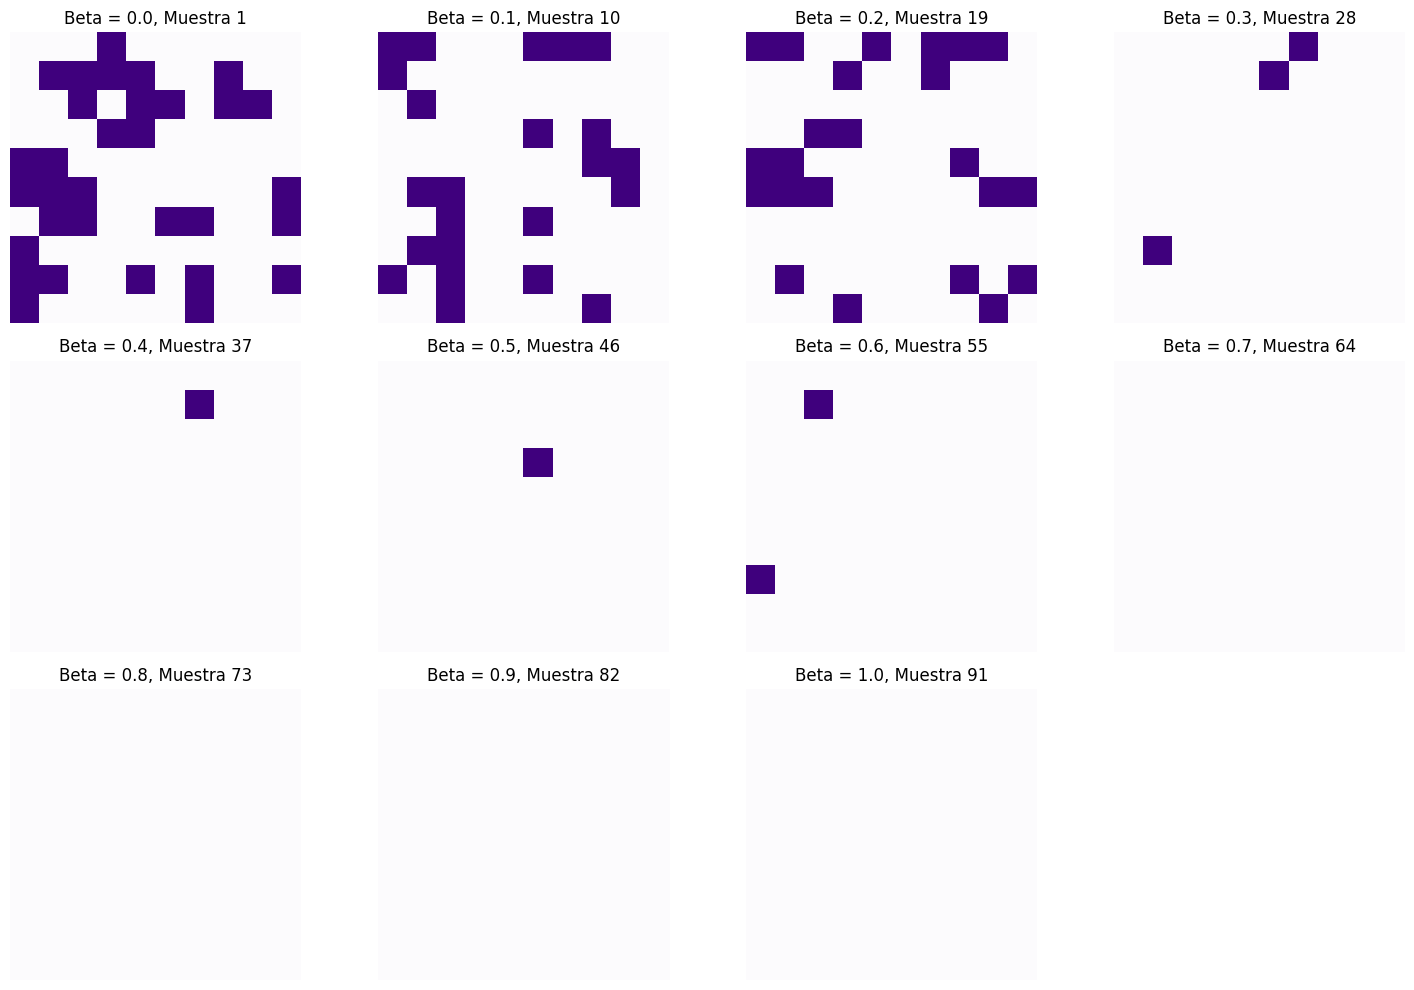

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, IntSlider, FloatSlider

# Función auxiliar para calcular la probabilidad de actualización
def calcular_probabilidad(beta, delta_energia):
    return 1 / (1 + np.exp(-2 * beta * delta_energia))

# Función para encontrar vecinos del vértice en la cuadrícula
def calcular_vecinos(lattice, i, j):
    vecinos = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    positivos = sum(lattice[(i + dx) % lattice.shape[0], (j + dy) % lattice.shape[1]] == 1
                    for dx, dy in vecinos)
    negativos = 4 - positivos  # 4 vecinos en total, resto son negativos
    return positivos, negativos

# Función para el muestreador de Gibbs
def gibbs_sampler(lattice, beta):
    # Selección de una posición aleatoria
    i, j = random.choices(range(lattice.shape[0]), k=2)  # Selección de una posición aleatoria
    vecinos_positivos, vecinos_negativos = calcular_vecinos(lattice, i, j)
    delta_energia = vecinos_positivos - vecinos_negativos

    # Calcular probabilidad de cambio usando la función auxiliar
    probabilidad_cambio = calcular_probabilidad(beta, delta_energia)
    lattice[i, j] = 1 if random.random() < probabilidad_cambio else -1

    return lattice

# Función para ejecutar el muestreador de Gibbs y generar 100 muestras para diferentes betas
def generar_muestras(tamaño, temp_inversas):
    num_total_muestras = 100  # Número total de muestras deseadas
    muestras_por_beta = num_total_muestras // len(temp_inversas)  # Número de muestras por cada valor de beta
    muestras = []  # Lista para almacenar todas las muestras

    for beta in temp_inversas:
        lattice = np.full((tamaño, tamaño), -1)  # Inicializar cuadrícula con -1


        # Iteración para el muestreo
        for _ in range(muestras_por_beta):
            # Ejecutar suficientes pasos de Gibbs para obtener una muestra
            for _ in range(tamaño**2):  # Actualizar todos los espines una vez
                lattice = gibbs_sampler(lattice, beta)
            muestras.append(np.copy(lattice))  # Almacenar la muestra

    print("100 muestras generadas para diferentes valores de beta.")
    return muestras

# Función para visualizar algunas muestras generadas
def graficar_muestras(muestras, temp_inversas):
    plt.figure(figsize=(15, 10))
    num_muestras = len(muestras)
    for i in range(0, num_muestras, num_muestras // len(temp_inversas)):  # Muestra una muestra por cada beta
        plt.subplot(3, 4, i // (num_muestras // len(temp_inversas)) + 1)
        plt.imshow(muestras[i], cmap='Purples', interpolation='nearest')
        plt.title(f"Beta = {temp_inversas[i // (num_muestras // len(temp_inversas))]:.1f}, Muestra {i + 1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Parámetros
tamaño_red = 10  # Dimensión de la red
temp_inversas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Lista de valores beta

# Generar y graficar las muestras
muestras = generar_muestras(tamaño_red, temp_inversas)
print(muestras)
graficar_muestras(muestras, temp_inversas)



---



#Ejercicio 2

Una hormiga ha sido desalojada su colonia ubicada en el punto (0,0) de la parcela $[0,1]$ x $[0,1]$.
Decide entonces la hormiga ***VISITAR*** todas la otras 75 colonias de su parcela ***SIN REPETIR***  

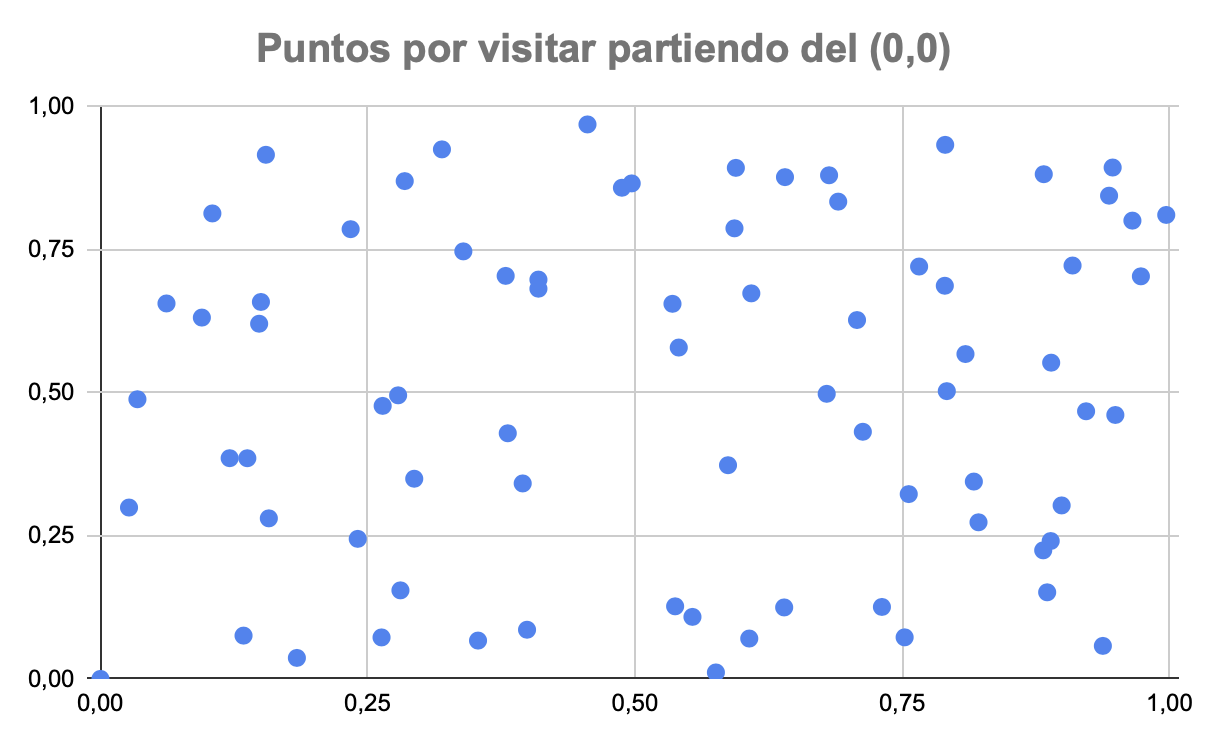

a)Use "simulated annealing" para ayudarle a la hormiga a encontrar el camino mas corto que recorra todas las parcelas.

**Reporte**
-Esquema de enfriamiento usado
-Distancia mínima obtenida
-Mapa generado para la hormiga

b)Repita el item a) si se sabe que la hormiga retornará a su colonia original , despues de haber recorrido todas las otras colonias.

#Solución

***Importar base de datos***

In [ ]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

# Función para calcular la distancia euclidiana entre dos puntos
def distancia(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Función para calcular la distancia total del recorrido
def calcular_distancia_total(ruta, colonias):
    distancia_total = 0
    for i in range(len(ruta) - 1):
        distancia_total += distancia(colonias[ruta[i]], colonias[ruta[i+1]])
    # Volver al inicio para cerrar el ciclo
    distancia_total += distancia(colonias[ruta[-1]], colonias[ruta[0]])
    return distancia_total

# Función de enfriamiento
def esquema_enfriamiento(temp, alpha):
    return temp * alpha

# Simulated Annealing
def simulated_annealing(colonias, temperatura_inicial, alpha, iteraciones_max):
    # Inicializar una ruta aleatoria
    n = len(colonias)
    ruta_actual = list(range(n))
    random.shuffle(ruta_actual)

    # Calcular la distancia de la ruta inicial
    mejor_ruta = list(ruta_actual)
    mejor_distancia = calcular_distancia_total(mejor_ruta, colonias)

    ruta = list(ruta_actual)
    distancia_actual = mejor_distancia

    temperatura = temperatura_inicial

    for i in range(iteraciones_max):
        # Generar una nueva ruta (perturbación) intercambiando dos colonias
        nuevo_ruta = list(ruta)
        idx1, idx2 = random.sample(range(n), 2)
        nuevo_ruta[idx1], nuevo_ruta[idx2] = nuevo_ruta[idx2], nuevo_ruta[idx1]

        # Calcular la nueva distancia
        nueva_distancia = calcular_distancia_total(nuevo_ruta, colonias)

        # Aceptar la nueva solución con una probabilidad dependiente de la temperatura
        if nueva_distancia < distancia_actual or random.random() < math.exp(-(nueva_distancia - distancia_actual) / temperatura):
            ruta = nuevo_ruta
            distancia_actual = nueva_distancia

            # Actualizar la mejor ruta encontrada
            if nueva_distancia < mejor_distancia:
                mejor_ruta = nuevo_ruta
                mejor_distancia = nueva_distancia

        # Enfriar el sistema
        temperatura = esquema_enfriamiento(temperatura, alpha)

    return mejor_ruta, mejor_distancia

# Datos del problema (las coordenadas de las colonias)
df = pd.read_excel('/content/drive/MyDrive/6 semestre/Cadenas de Marcov/Problema de la hormiga desalojada.xlsx')
df = df[:-6]
df = df[['Coordenada X','Coordenada Y']]
colonias = df[['Coordenada X', 'Coordenada Y']].values

# Parámetros del algoritmo
temperatura_inicial = 1000
alpha = 0.99
iteraciones_max = 10000

# Ejecutar Simulated Annealing
mejor_ruta, mejor_distancia = simulated_annealing(colonias, temperatura_inicial, alpha, iteraciones_max)

# Reportar los resultados
print(f"Esquema de enfriamiento: geométrico, T(k+1) = {alpha} * T(k)")
print(f"Distancia mínima obtenida: {mejor_distancia}")

# Graficar la ruta obtenida
ruta_coords = [colonias[i] for i in mejor_ruta] + [colonias[mejor_ruta[0]]]  # Para cerrar


Esquema de enfriamiento: geométrico, T(k+1) = 0.99 * T(k)
Distancia mínima obtenida: 10.589167105576934


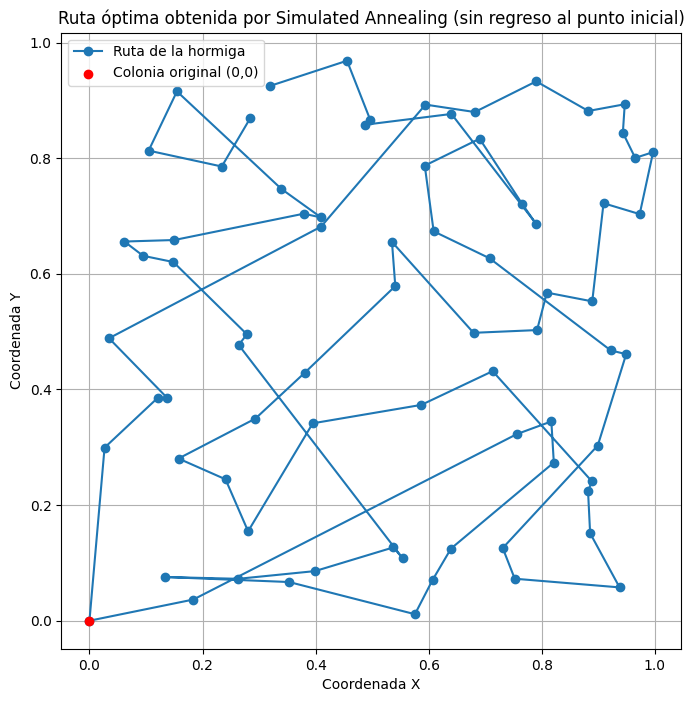

In [ ]:
# Graficar la ruta obtenida sin volver al punto inicial
ruta_coords = [colonias[i] for i in mejor_ruta]  # Ruta sin cerrar
ruta_coords = np.array(ruta_coords)

plt.figure(figsize=(8,8))
plt.plot(ruta_coords[:,0], ruta_coords[:,1], 'o-', label='Ruta de la hormiga')
plt.scatter(colonias[0,0], colonias[0,1], color='red', label='Colonia original (0,0)', zorder=5)
plt.title('Ruta óptima obtenida por Simulated Annealing (sin regreso al punto inicial)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import math

def dist_path(x, y):
    dist = 0.0
    n = len(x)

    for i in range(n - 1):
        dist += math.sqrt((y[i + 1] - y[i])**2 + (x[i + 1] - x[i])**2)

    return dist


In [ ]:
import random
import numpy as np

def new_neighbor(x, y):
    i = random.randint(2, 76)
    j = random.randint(i, 76)

    new_x = np.copy(x)
    new_y = np.copy(y)

    new_x[i:j] = new_x[i:j][::-1]  # Reversing the slice of x
    new_y[i:j] = new_y[i:j][::-1]  # Reversing the slice of y

    return new_x, new_y

In [ ]:
import numpy as np
import random
import math

def simulated_annealing_1(x, y):
    curr_points = {"x": np.copy(x), "y": np.copy(y)}

    n = 1
    while n < 7:
        for _ in range(1, int(1e6)):
            T = 1 / (10 * n)

            p2_x, p2_y = new_neighbor(curr_points["x"], curr_points["y"])
            e = dist_path(curr_points["x"], curr_points["y"])
            e_ = dist_path(p2_x, p2_y)

            u = random.random()

            if u < min(1, math.exp((e - e_) / T)):
                curr_points = {"x": np.copy(p2_x), "y": np.copy(p2_y)}

        n += 1

    return curr_points


In [ ]:
x_points = df['Coordenada X'].values # Example values
y_points = df['Coordenada Y'].values  # Example values

final_neighbor = simulated_annealing_1(x_points, y_points)
print(final_neighbor)

final_distance = dist_path(final_neighbor["x"], final_neighbor["y"])
print("Final distance:", final_distance)


{'x': array([0.        , 0.6401948 , 0.59425005, 0.49683601, 0.48770178,
       0.45548882, 0.31936546, 0.28455705, 0.15470798, 0.10465497,
       0.233981  , 0.33937816, 0.37896249, 0.40960775, 0.40960048,
       0.53497468, 0.54084931, 0.6087055 , 0.59295341, 0.68997466,
       0.6814314 , 0.79002582, 0.88221372, 0.94665169, 0.94329939,
       0.96512103, 0.99677415, 0.97306404, 0.90914764, 0.76563671,
       0.78967572, 0.70756197, 0.67921518, 0.80899694, 0.88914983,
       0.94916593, 0.92180953, 0.79152632, 0.71299769, 0.58691362,
       0.75594301, 0.81683198, 0.82119398, 0.89893308, 0.88871026,
       0.881702  , 0.88541366, 0.93749301, 0.75209917, 0.730863  ,
       0.63944283, 0.60678731, 0.53745222, 0.55366082, 0.57559441,
       0.39895641, 0.35312074, 0.2628839 , 0.18370392, 0.13381271,
       0.28056239, 0.24061812, 0.29345961, 0.39489794, 0.38092605,
       0.26393333, 0.27838436, 0.14840974, 0.15007507, 0.09483427,
       0.06174778, 0.03456659, 0.02671012, 0.12083757, 0

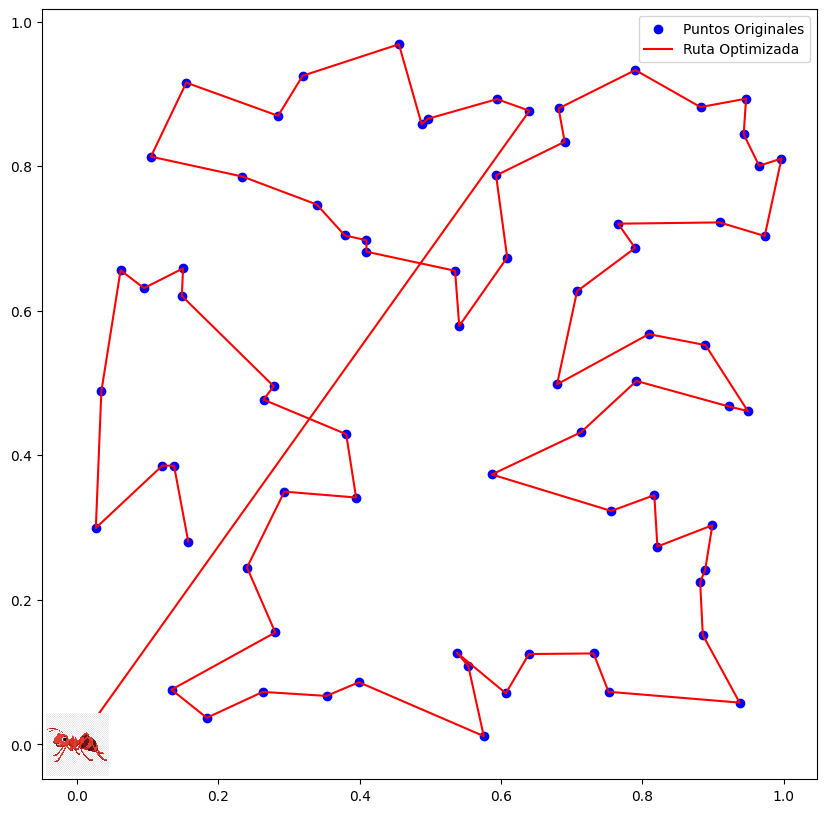

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg  # Para cargar la imagen

# Cargar la imagen de la hormiguita
ant_image = mpimg.imread('/content/drive/MyDrive/6 semestre/Cadenas de Marcov/png-clipart-ant-cartoon-red-ants-photography-insects.png')  # Asegúrate de colocar la ruta correcta

# Definir el tamaño de la figura
plt.figure(figsize=(10, 10))

# Graficar los puntos originales (x_points, y_points) usando scatter
plt.scatter(x_points, y_points, color='blue', label='Puntos Originales')

# Graficar la ruta optimizada (final_neighbor["x"], final_neighbor["y"])
plt.plot(final_neighbor["x"], final_neighbor["y"], color='red', label='Ruta Optimizada')

# Elegir un punto donde quieras colocar la hormiga (ejemplo: el primer nodo)
x_ant = final_neighbor["x"][0]  # Coordenada x del nodo donde pondrás la hormiga
y_ant = final_neighbor["y"][0]  # Coordenada y del nodo donde pondrás la hormiga

# Crear un OffsetImage para la hormiga
imagebox = OffsetImage(ant_image, zoom=0.05)  # Ajusta el tamaño de la imagen con el parámetro zoom

# Crear el AnnotationBbox para colocar la imagen en el gráfico
ab = AnnotationBbox(imagebox, (x_ant, y_ant), frameon=False)

# Añadir la imagen al gráfico
plt.gca().add_artist(ab)

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


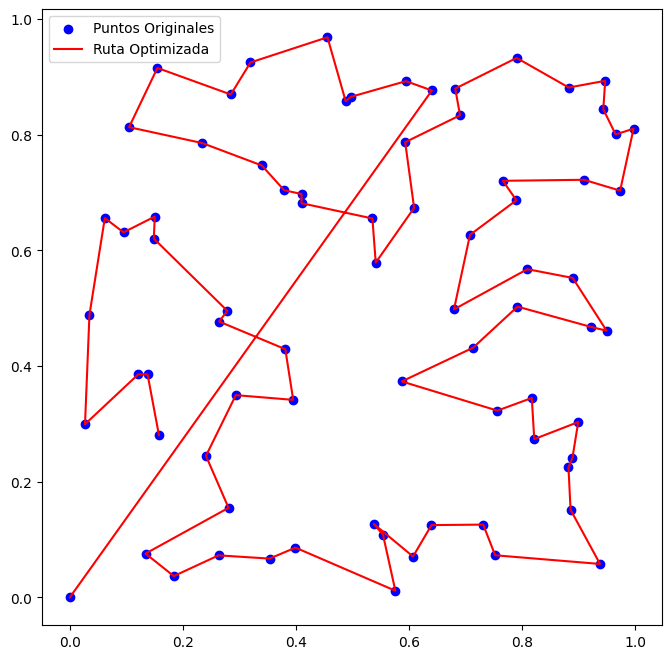

In [ ]:
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
plt.figure(figsize=(8, 8))

# Graficar los puntos originales (x_points, y_points) usando scatter
plt.scatter(x_points, y_points, color='blue', label='Puntos Originales')

# Graficar la ruta optimizada (final_neighbor["x"], final_neighbor["y"])
plt.plot(final_neighbor["x"], final_neighbor["y"], color='red', label='Ruta Optimizada')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import math

def calcular_distancia_ruta(coordenadas_x, coordenadas_y):

    distancia_total = 0.0
    numero_puntos = len(coordenadas_x)

    for i in range(numero_puntos - 1):
        distancia_total += math.sqrt((coordenadas_y[i + 1] - coordenadas_y[i])**2 + (coordenadas_x[i + 1] - coordenadas_x[i])**2)

    return distancia_total

In [ ]:
import random
import numpy as np

def nueva_ruta(coordenadas_x, coordenadas_y):

    # Selecciona aleatoriamente dos índices i y j
    i = random.randint(2, 76)
    j = random.randint(i, 76)

    # Crea copias de las coordenadas originales
    nuevo_x = np.copy(coordenadas_x)
    nuevo_y = np.copy(coordenadas_y)

    # Invierte el orden de los puntos entre los índices i y j
    nuevo_x[i:j] = nuevo_x[i:j][::-1]
    nuevo_y[i:j] = nuevo_y[i:j][::-1]

    return nuevo_x, nuevo_y


In [ ]:
def simulated_annealing(coordenadas_x, coordenadas_y):

    # Inicializa las coordenadas actuales
    puntos_actuales = {"x": np.copy(coordenadas_x), "y": np.copy(coordenadas_y)}

    # Inicialización de la temperatura y el ciclo de enfriamiento
    iteracion = 1
    while iteracion < 7:
        for k in range(1, 1000000):
            temperatura = 1 / (10 * iteracion)  # Esquema de enfriamiento

            # Ruta a seguir
            nuevo_x, nuevo_y = nueva_ruta(puntos_actuales["x"], puntos_actuales["y"])


            costo_ruta_actual = calcular_distancia_ruta(puntos_actuales["x"], puntos_actuales["y"])
            costo_ruta_vecina = calcular_distancia_ruta(nuevo_x, nuevo_y)


            aleatorio = random.random()


            if aleatorio < min(1, math.exp((costo_ruta_actual - costo_ruta_vecina ) / temperatura)):
                puntos_actuales = {"x": np.copy(nuevo_x), "y": np.copy(nuevo_y)}

        iteracion += 1

    return puntos_actuales

In [ ]:
#Cargamos las coordenadas

df = pd.read_excel('/content/drive/MyDrive/6 semestre/Cadenas de Marcov/Problema de la hormiga desalojada.xlsx')
df = df[:-6]
df = df[['Coordenada X','Coordenada Y']]

coordenadas_x = df['Coordenada X'].values
coordenadas_y = df['Coordenada Y'].values

In [ ]:
# Ejecución del algoritmo del simulated annealing
ruta_final = simulated_annealing(coordenadas_x, coordenadas_y)

In [ ]:
print("Ruta Final Recorrida por la hormiga:", ruta_final)

Ruta Final Recorrida por la hormiga: {'x': array([0.        , 0.6401948 , 0.59425005, 0.48770178, 0.49683601,
       0.45548882, 0.31936546, 0.28455705, 0.15470798, 0.10465497,
       0.233981  , 0.33937816, 0.37896249, 0.40960775, 0.40960048,
       0.54084931, 0.53497468, 0.6087055 , 0.59295341, 0.68997466,
       0.6814314 , 0.79002582, 0.88221372, 0.94665169, 0.94329939,
       0.96512103, 0.99677415, 0.97306404, 0.90914764, 0.78967572,
       0.76563671, 0.70756197, 0.80899694, 0.88914983, 0.94916593,
       0.92180953, 0.79152632, 0.67921518, 0.71299769, 0.58691362,
       0.75594301, 0.81683198, 0.82119398, 0.881702  , 0.88871026,
       0.89893308, 0.88541366, 0.93749301, 0.75209917, 0.730863  ,
       0.63944283, 0.60678731, 0.57559441, 0.55366082, 0.53745222,
       0.39895641, 0.35312074, 0.2628839 , 0.18370392, 0.13381271,
       0.28056239, 0.24061812, 0.29345961, 0.39489794, 0.38092605,
       0.27838436, 0.26393333, 0.15007507, 0.14840974, 0.09483427,
       0.06174778, 

In [ ]:
# Cálculo de la distancia final
distancia_final = calcular_distancia_ruta(ruta_final["x"], ruta_final["y"])

In [ ]:
print("Distancia final:", distancia_final)

Distancia final: 7.821196291742906


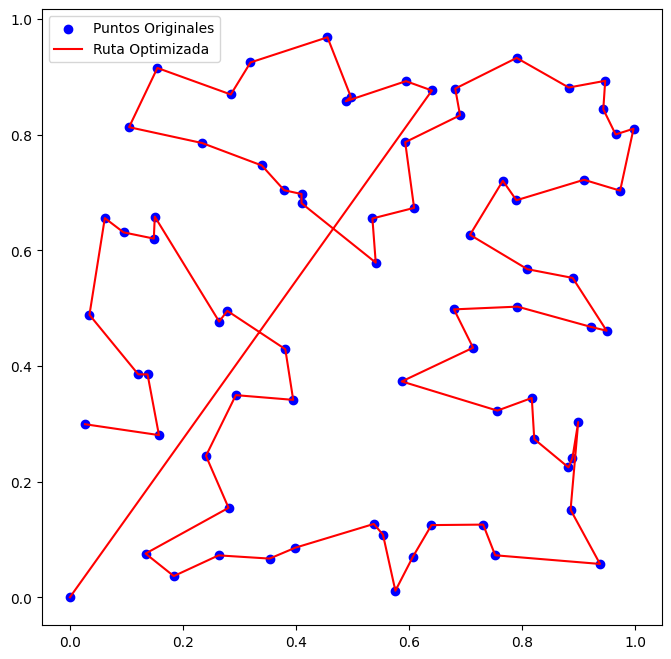

In [ ]:
plt.figure(figsize=(8, 8))

# Graficar los puntos originales (x_points, y_points) usando scatter
plt.scatter(coordenadas_x, coordenadas_y, color='blue', label='Puntos Originales')

# Graficar la ruta optimizada (final_neighbor["x"], final_neighbor["y"])
plt.plot(ruta_final["x"], ruta_final["y"], color='red', label='Ruta Optimizada')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

***REPORTE***

El esquema de enfriamiento que utilizamos corresponde a una disminución lineal de la temperatura inversamente proporcional al número de iteración 𝑛.Es decir:

$$T = \frac{1}{(10 * n)}$$

La temperatura inicial $T_{0}$ es $T = \frac{1}{10}$ en la primera iteracion $n=1$.

A medida que $n$ aumenta, la temperatura disminuye de manera proporcional a $\frac {1}{n}$lo cual implica que la temperatura se va "enfriando" a lo largo del tiempo.

La distancia mínima obtenida fue: 7.876269152202981



---



***Punto B***

Para regresar al origen bastará con agregrar de nuevo el origen (0,0) a las colonias.

In [ ]:
coordenadas_x = df['Coordenada X'].values
coordenadas_y = df['Coordenada Y'].values

coordenadas_x_C = np.copy(coordenadas_x)
coordenadas_y_C = np.copy(coordenadas_y)

# Se agrega el origen

coordenadas_x_C  = np.append(coordenadas_x_C , 0)
coordenadas_y_C  = np.append(coordenadas_y_C , 0)


ruta_final_con_origen = simulated_annealing(coordenadas_x_C , coordenadas_y_C )


In [ ]:
# Resultado del vecino final optimizado
print("Distancia final con origen:", ruta_final_con_origen)

Distancia final con origen: {'x': array([0.        , 0.6401948 , 0.59425005, 0.49683601, 0.48770178,
       0.45548882, 0.31936546, 0.28455705, 0.233981  , 0.15470798,
       0.10465497, 0.15007507, 0.14840974, 0.09483427, 0.06174778,
       0.03456659, 0.13735007, 0.12083757, 0.02671012, 0.15746602,
       0.24061812, 0.29345961, 0.39489794, 0.38092605, 0.26393333,
       0.27838436, 0.33937816, 0.40960775, 0.37896249, 0.40960048,
       0.54084931, 0.53497468, 0.6087055 , 0.59295341, 0.68997466,
       0.6814314 , 0.79002582, 0.88221372, 0.94665169, 0.94329939,
       0.96512103, 0.99677415, 0.90914764, 0.97306404, 0.78967572,
       0.76563671, 0.70756197, 0.79152632, 0.92180953, 0.94916593,
       0.88914983, 0.80899694, 0.67921518, 0.71299769, 0.58691362,
       0.75594301, 0.81683198, 0.82119398, 0.89893308, 0.88871026,
       0.881702  , 0.88541366, 0.93749301, 0.75209917, 0.730863  ,
       0.63944283, 0.60678731, 0.57559441, 0.55366082, 0.53745222,
       0.39895641, 0.3531207

In [ ]:
# Cálculo de la distancia final
distancia_final = calcular_distancia_ruta(ruta_final_con_origen["x"], ruta_final_con_origen["y"])

In [ ]:
print("Distancia final:", distancia_final)

Distancia final: 8.128394122374488


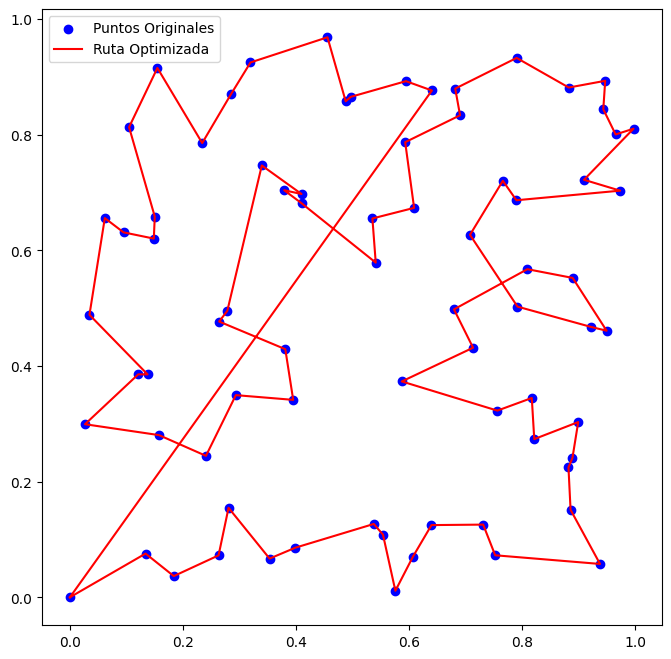

In [ ]:
plt.figure(figsize=(8, 8))

# Graficar los puntos originales (x_points, y_points) usando scatter
plt.scatter(coordenadas_x, coordenadas_y, color='blue', label='Puntos Originales')

# Graficar la ruta optimizada (final_neighbor["x"], final_neighbor["y"])
plt.plot(ruta_final_con_origen["x"], ruta_final_con_origen["y"], color='red', label='Ruta Optimizada')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()